# Three identity neurons

In [1]:
import numpy as np
from spikeflow import BPNNModel, IdentityNeuronLayer
import spikeflow.drawing_utils.trace_renderers as rend

/Applications/Anaconda/anaconda/envs/mlbook/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Create a model layer with 3 neurons in a single layer

In [2]:
model_input_shape = (3,)

nl = IdentityNeuronLayer('n1', 3)

model = BPNNModel.compiled_model(model_input_shape, [nl], [])

# Run the model for 1000 timesteps

In [3]:
traces = []

def end_time_step_callback(i, graph, sess, results):
    traces.append(results)
    
data = (np.ones(3,)*(7 if i > 200 else 0) for i in range(0, 1000))
    
model.run_time(data, end_time_step_callback)

# Extract the data we want and display

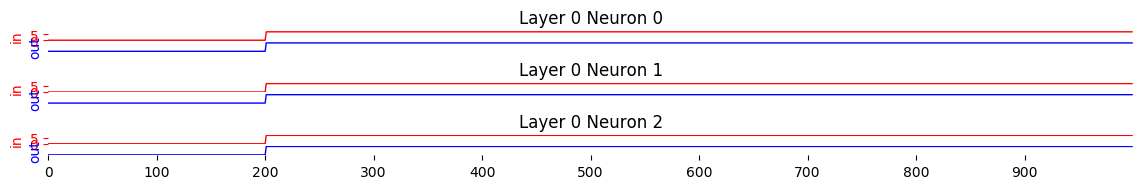

In [4]:
neuron_layer_0_traces = np.array([r['n1'] for r in traces])

rend.render_figure([rend.IdentityNeuronTraceRenderer(neuron_layer_0_traces, 
                                                     'Layer 0 Neuron')], 0, 1000)